# Detect Spam E-mails using Naive Bayes

## Problem Statement

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

## Step 0. Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1. Import Data

In [7]:
spam_df = pd.read_csv("data/email-spam/emails.csv")
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## Step 2A. Explore Data


In [10]:
spam_df.shape

(5728, 2)

In [12]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [14]:
spam_df['spam'].value_counts()

# Not Spam = 0
# Spam =  1

0    4360
1    1368
Name: spam, dtype: int64

## Step 2B. Visualize Data

In [15]:
ham = spam_df[spam_df["spam"] == 0]

In [16]:
ham.head()

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


In [17]:
spam = spam_df[spam_df["spam"]==1]

In [18]:
spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [21]:
print("Spam Percentage = ", len(spam)/len(spam_df)*100)

Spam Percentage =  23.88268156424581


In [22]:
print("Ham Percentage = ", len(ham)/len(spam_df)*100)

Ham Percentage =  76.11731843575419


Text(0.5, 1.0, 'Count of Ham vs Spam')

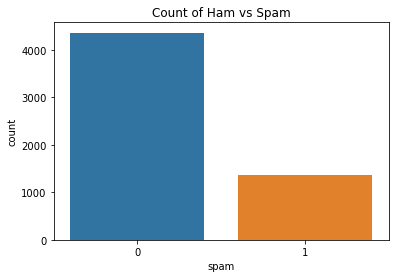

In [31]:
sns.countplot(spam_df['spam'], label="Count of Ham vs Spam");
plt.title("Count of Ham vs Spam")

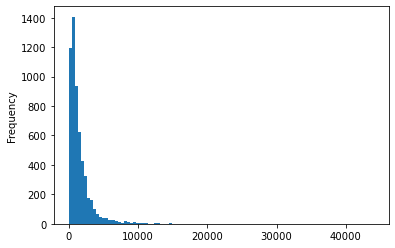

In [34]:
spam_df['length'] = spam_df['text'].apply(len)
spam_df['length'].plot(bins=100, kind='hist') 

In [35]:
spam_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

## Step 3. Cleaning and splitting data

### Count Vectorizer Example

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

sample_vectorizer = CountVectorizer()
X = sample_vectorizer.fit_transform(sample_data)

In [39]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [41]:
print(sample_vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


### Apply count vectorizer to our spam/ham

In [43]:
vectorizer = CountVectorizer()
spamham_countvectorizer = vectorizer.fit_transform(spam_df.text)

In [90]:
print(vectorizer.get_feature_names()[-15:])

['zwabic', 'zwischen', 'zwlaszcza', 'zwrocic', 'zwwyw', 'zwzm', 'zxghlajf', 'zyban', 'zyc', 'zygoma', 'zymg', 'zzmacmac', 'zzn', 'zzncacst', 'zzzz']


In [46]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
spamham_countvectorizer.shape

(5728, 37303)

## Step 4A. Training the Model

In [48]:
label = spam_df["spam"].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [51]:
testing_sample = ["Free money!!!", "Hi Kim, please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

In [54]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict
## Our model works so far

array([1, 0], dtype=int64)

## Step 4B. Divide the data into training and testing prior to training

In [55]:
X = spamham_countvectorizer
y = label

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
NB_classifier_two = MultinomialNB()
NB_classifier_two.fit(X_train, y_train)

MultinomialNB()

## Step 5. Evaluating the model

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
y_preds_train = NB_classifier_two.predict(X_train)
y_preds_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [69]:
cm = confusion_matrix(y_train, y_preds_train)
cm

array([[3459,   16],
       [   1, 1106]], dtype=int64)

### Test data

In [64]:
y_preds = NB_classifier_two.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[873,  12],
       [  2, 259]], dtype=int64)

### Our model performed extremely well, only incorrectly assigning 14 emails

In [70]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       885
           1       0.96      0.99      0.97       261

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

